# Working with USGS data

Raw data:

http://earthquake.usgs.gov/data/centennial/centennial_Y2K.CAT

README:  http://earthquake.usgs.gov/data/centennial/centennial_README.rtf

Stable Continental Regions:

http://earthquake.usgs.gov/data/scr_catalog.txt

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas
from karmapi import base, maps, show

from karmapi import usgs

from matplotlib import pyplot

### go to where the karma is

In [3]:
cd ~/karmapi

/home/jng/karmapi


In [4]:
# if you don't already have the data this downloads and saves it -- uncomment to get the data

# df = usgs.get()
# base.save('data/quake/centennial', df)

In [5]:
pandas.set_option('display.notebook', False)
pandas.set_eng_float_format(1, True)

In [6]:
df = base.load('data/quake/centennial')

In [7]:
df.index = pandas.to_datetime(df.apply(usgs.timestamp, axis=1))

In [8]:
#pandas.set_eng_float_format(3, False)
min_severity = 7.2
df['flag'] = 1
df = df[df.severity >= min_severity]
df = df.resample('M', how='sum').fillna(0)

In [9]:
df.head()

            year  month   day  hour  minute  second   lat   lon    foo    bar  \
1900-01-31  3.8k    2.0  51.0  25.0    55.0     0.0  68.0  41.0  450.0  718.0   
1900-02-28   0.0    0.0   0.0   0.0     0.0     0.0   0.0   0.0    0.0    0.0   
1900-03-31   0.0    0.0   0.0   0.0     0.0     0.0   0.0   0.0    0.0    0.0   
1900-04-30   0.0    0.0   0.0   0.0     0.0     0.0   0.0   0.0    0.0    0.0   
1900-05-31   0.0    0.0   0.0   0.0     0.0     0.0   0.0   0.0    0.0    0.0   

            foobar  severity  flag  
1900-01-31     0.0      14.8   2.0  
1900-02-28     0.0       0.0   0.0  
1900-03-31     0.0       0.0   0.0  
1900-04-30     0.0       0.0   0.0  
1900-05-31     0.0       0.0   0.0  

In [10]:
df['dim'] = df.index.days_in_month

In [11]:
df.head()

            year  month   day  hour  minute  second   lat   lon    foo    bar  \
1900-01-31  3.8k    2.0  51.0  25.0    55.0     0.0  68.0  41.0  450.0  718.0   
1900-02-28   0.0    0.0   0.0   0.0     0.0     0.0   0.0   0.0    0.0    0.0   
1900-03-31   0.0    0.0   0.0   0.0     0.0     0.0   0.0   0.0    0.0    0.0   
1900-04-30   0.0    0.0   0.0   0.0     0.0     0.0   0.0   0.0    0.0    0.0   
1900-05-31   0.0    0.0   0.0   0.0     0.0     0.0   0.0   0.0    0.0    0.0   

            foobar  severity  flag  dim  
1900-01-31     0.0      14.8   2.0   31  
1900-02-28     0.0       0.0   0.0   28  
1900-03-31     0.0       0.0   0.0   31  
1900-04-30     0.0       0.0   0.0   30  
1900-05-31     0.0       0.0   0.0   31  

In [12]:
df.tail()

             year  month   day  hour  minute  second   lat    lon    foo  bar  \
2007-05-31    0.0    0.0   0.0   0.0     0.0     0.0   0.0    0.0    0.0  0.0   
2007-06-30    0.0    0.0   0.0   0.0     0.0     0.0   0.0    0.0    0.0  0.0   
2007-07-31    0.0    0.0   0.0   0.0     0.0     0.0   0.0    0.0    0.0  0.0   
2007-08-31   6.0k   24.0  24.0  57.0    52.0   166.9 -34.9  198.8  449.0  0.0   
2007-09-30  10.0k   45.0  84.0  53.0   125.0   142.5 -46.0  674.8  393.8  0.0   

            foobar  severity  flag  dim  
2007-05-31     0.0       0.0   0.0   31  
2007-06-30     0.0       0.0   0.0   30  
2007-07-31     0.0       0.0   0.0   31  
2007-08-31    1.3k      22.7   3.0   31  
2007-09-30    1.8k      38.5   5.0   30  

In [13]:
df['value'] = (df.flag / df.dim).fillna(0)

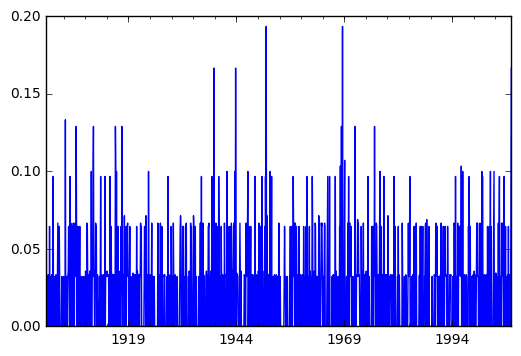

In [14]:
df.value.plot()

In [15]:
value = df.value

In [16]:
len(df), len(value)

(1293, 1293)

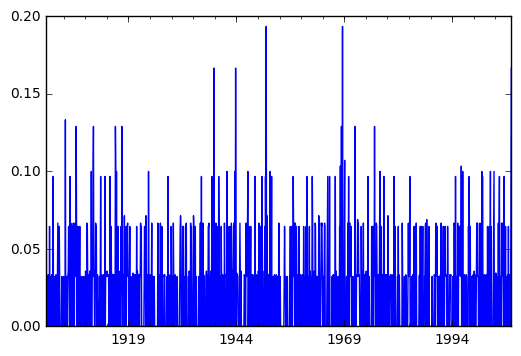

In [17]:
value.plot()

In [18]:
so = base.sono(value.values, 12 * 48)

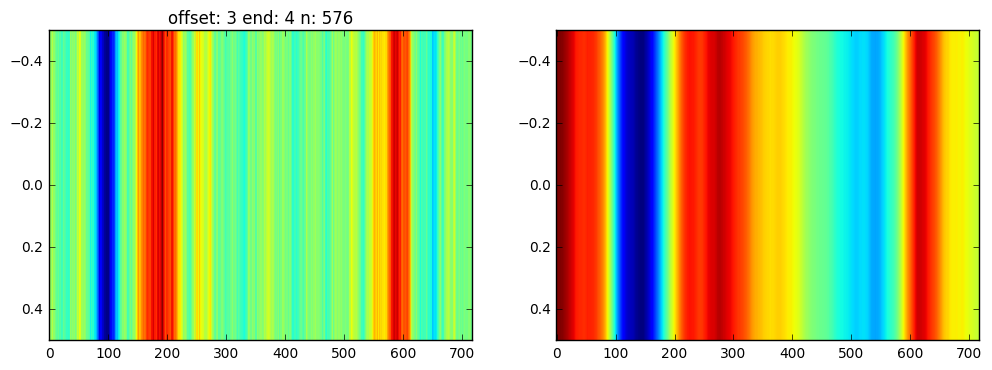

In [47]:
offset = 3

end = offset + 1
show.sono2(so, offset=offset, end=end, cmap=None)

In [20]:
def isprime(n):
    
    for k in range(2, 1 + int(n ** 0.5)):
        #print(k, n/k)
        if (n // k) == (n/k):
            #print(n, k)
            return False
    return True

In [21]:
# look at first k fourier compoments
k = 96

p = set([1+x for x in range(k) if isprime(1+x)])

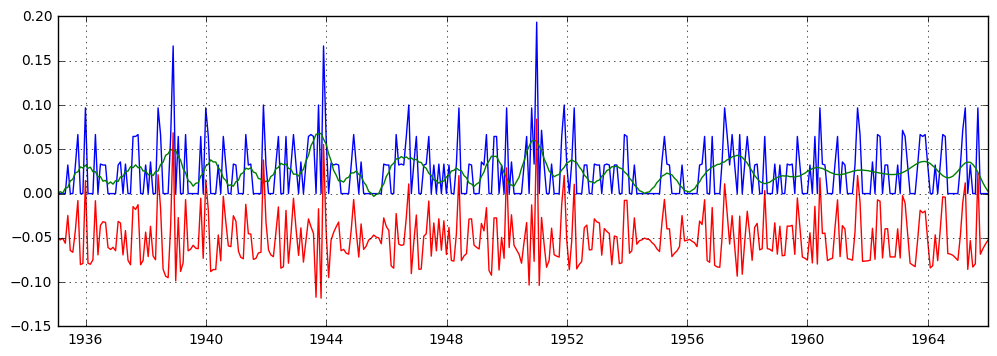

In [22]:
k = 96
vfft = base.fft.fft(value.values)

points = p

points = set(range(1, k))

for x in range(1, int(len(vfft)/2)):
    if x not in points:
        vfft[x] = 0
        vfft[-x] = 0

iso = base.fft.ifft(vfft)

xdf = value.copy().to_frame()
xdf['kvalue'] = iso.real
xdf['delta'] = xdf.value - (xdf.kvalue +.05)

show.wide()
pyplot.grid(True)
pyplot.plot(xdf['1935':'1965'])

In [23]:
xdf.describe()

        value  kvalue   delta
count    1.3k    1.3k    1.3k
mean    23.4m   23.4m  -50.0m
std     30.2m   12.0m   27.7m
min       0.0   -3.2m -118.1m
25%       0.0   14.9m  -70.1m
50%       0.0   23.0m  -56.3m
75%     33.3m   30.3m  -34.8m
max    193.5m   68.1m   90.8m

In [24]:
a = xdf.value.std()
b = xdf.delta.std()

(a-b)/a

0.082680814191082086

In [25]:
sfft = base.fft.fft(value.values)

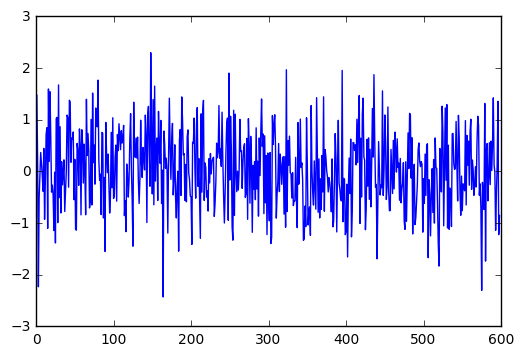

In [26]:
pyplot.plot(sfft.real[1:600])`

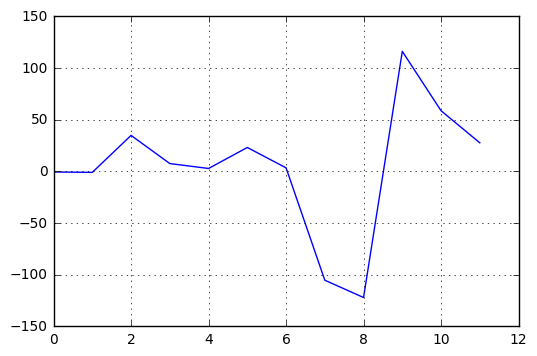

In [50]:
k = 7
a = [x[k] for x in so]

afft = base.fft.fft(a)

pyplot.plot(afft.imag[:3*4])
pyplot.grid(True)